In [49]:
import json  
import zipfile
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
d = None  
data = None  
with zipfile.ZipFile("/home/wenbenc/two-sigma-connect-rental-listing-inquiries/train.json.zip", "r") as z:
    for filename in z.namelist():
        print(filename)
        with z.open(filename) as f:
            data = f.read()
            d = json.loads(data.decode("utf-8"))

train.json


In [52]:
maxprice = my_df['price'].max()
bin = [0,100,1000,2000,3000,4000,5000,6000,6500,maxprice]
my_df['PriceInterval'] = pd.cut(my_df['price'], bin)
price_count = pd.value_counts(my_df.PriceInterval, sort = False)

price_count = price_count.to_frame()

In [53]:
print(price_count)

                 PriceInterval
(0, 100]                     2
(100, 1000]                 19
(1000, 2000]              5288
(2000, 3000]             17845
(3000, 4000]             13442
(4000, 5000]              5835
(5000, 6000]              3158
(6000, 6500]               977
(6500, 4490000]           2786


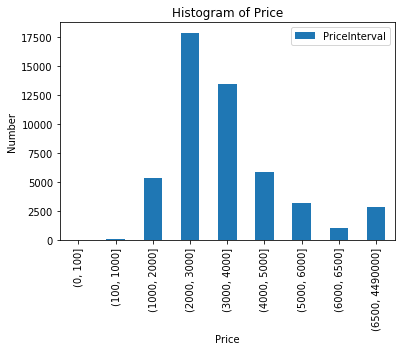

In [54]:
price_count.plot(kind='bar', title= 'Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

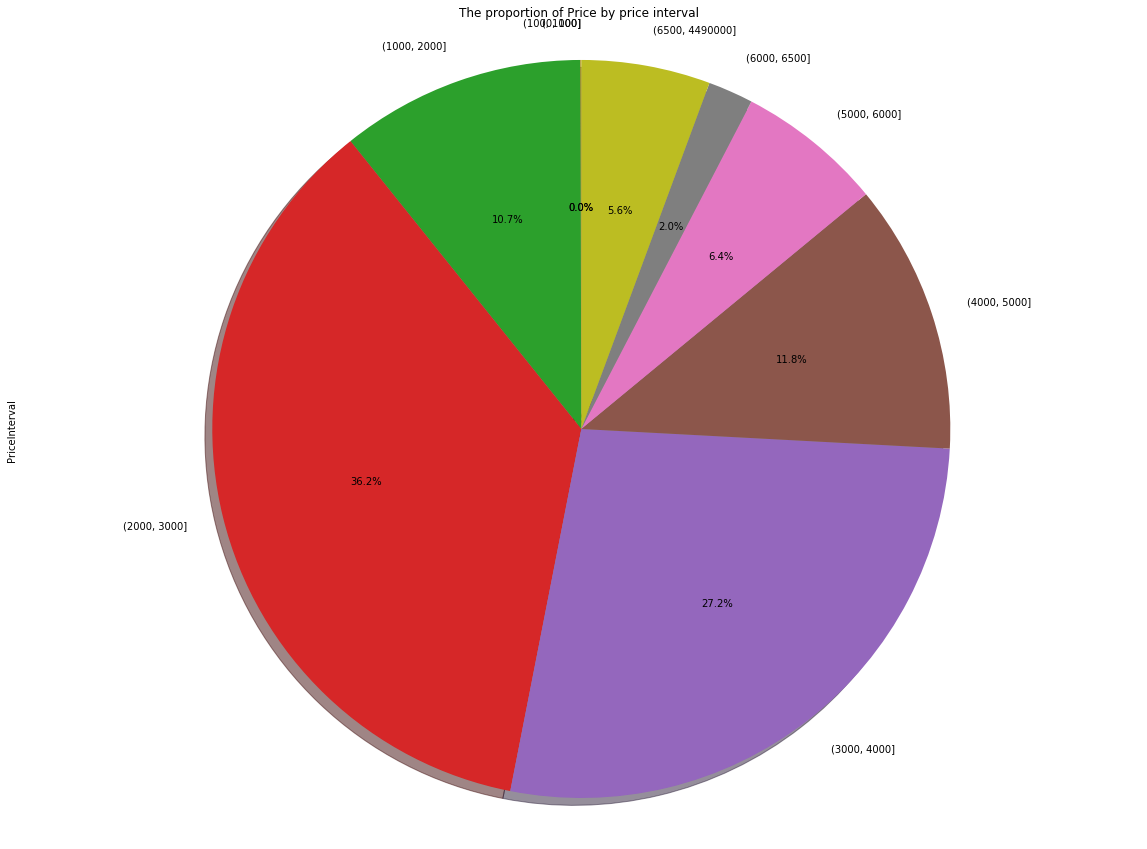

In [55]:
price_count['PriceInterval'].plot(kind='pie',
                       figsize=(20,15),
                       autopct = '%1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Price by price interval')
plt.axis('equal')
plt.show()

In [56]:
# Find out the maximum Bathrooms dataset
maxBath = int(my_df['bathrooms'].max()) + 1
# Find out the minimum Bathrooms dataset
minBath = int(my_df['bathrooms'].min()) 

# Analyze the bathroom data from dataset
step = 1
bathroomBin = []
for index in range(minBath, maxBath, step):
    bathroomBin.append(index)

my_df['bathInterval'] = pd.cut(my_df['bathrooms'], bathroomBin)
df_countBath = pd.value_counts(my_df.bathInterval, sort = False)

df_countBath = df_countBath.to_frame()
# Delete the interval with no attribute
df_countBath = df_countBath[(df_countBath.T != 0).any()]

In [57]:
# Output the list of bathroom data
print(df_countBath)

         bathInterval
(0, 1]          39422
(1, 2]           8305
(2, 3]           1022
(3, 4]            229
(4, 5]             49
(5, 6]              9
(6, 7]              2
(9, 10]             1


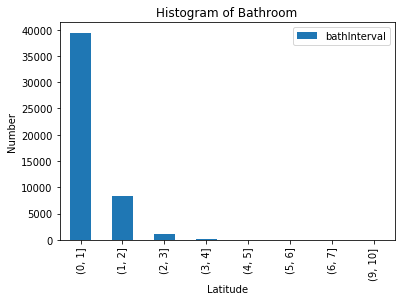

In [58]:
# Plot the histogram for bathroom data
df_countBath.plot(kind='bar', title= 'Histogram of Bathroom')
plt.xlabel('Latitude')
plt.ylabel('Number')
plt.show()

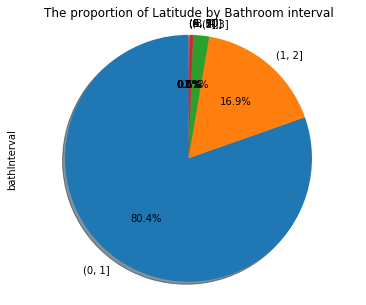

In [59]:
# Display the proportion of bathroom by bathroom interval
df_countBath['bathInterval'].plot(kind='pie',
                       figsize=(6,5),
                       autopct = '%1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Latitude by Bathroom interval')
plt.axis('equal')
plt.show()